In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, feature_selection
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

/Users/mingchen/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [41]:
# #############################################################################
# Import some data to play with
digits = datasets.load_digits()
y = digits.target
# Throw away data, to be in the curse of dimension settings
y = y[:200]
X = digits.data[:200]
n_samples = len(y)
X = X.reshape((n_samples, -1))
# add 200 non-informative features
X = np.hstack((X, 2 * np.random.random((n_samples, 200))))

In [44]:
fs = feature_selection.SelectPercentile(feature_selection.f_classif)
clf = svm.SVC(C=1.0)
pipeline = Pipeline([('feature_reduction', fs), ('classification', clf)])

/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 0  7  8 15 16 23 24 31 32 39 40 47 48 56 63] are constant.
  UserWarning)
/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 0  8 15 16 23 31 32 39 40 48 56] are constant.
  UserWarning)
/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 0  8 15 16 23 31 32 39 40 48 56] are constant.
  Us

/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 0  7  8 15 16 23 24 31 32 39 40 47 48 56 63] are constant.
  UserWarning)
/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 0  8 15 16 23 31 32 39 40 48 56] are constant.
  UserWarning)
/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 0  8 15 16 23 31 32 39 40 48 56] are constant.
  Us

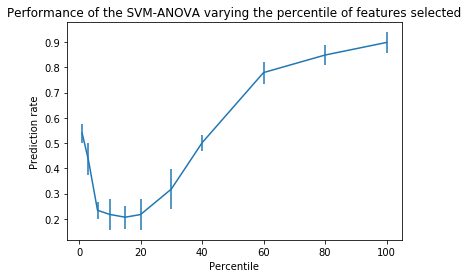

In [45]:
# fit models
score_means = []
score_stds = []
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for p in percentiles:
    pipeline.set_params(feature_reduction__percentile=p)
    this_scoers = cross_val_score(pipeline, X, y, n_jobs=1)
    score_means.append(this_scoers.mean())
    score_stds.append(this_scoers.std())
    
    
plt.errorbar(percentiles, score_means, score_stds)
plt.title('Performance of the SVM-ANOVA varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()

In [36]:
score_stds

[0.03685386820874363,
 0.063703990418986,
 0.032526189114443715,
 0.06127665230501157,
 0.04558948060747641,
 0.058199015868684506,
 0.07858196347939847,
 0.03836336949044546,
 0.049756727522503395,
 0.039005823591030865,
 0.0404216115665435]

In [ ]:
X[0]